In [11]:
import matplotlib.pyplot as plt
import glob 
import cv2
import os
import random
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
import tensorflow as tf

## Read Data

In [21]:
img_size = 48  
batch_size = 256
datagen_train = ImageDataGenerator(rescale=1.0/255.0)
train_generator = datagen_train.flow_from_directory("C:/Users/fatem/Downloads/images_face/train",
                                                  target_size = (img_size,img_size),
                                                  color_mode = "grayscale",
                                                  batch_size = batch_size,
                                                  class_mode = "categorical",
                                                  shuffle = True)

datagen_test = ImageDataGenerator(rescale=1.0/255.0)
test_generator = datagen_test.flow_from_directory("C:/Users/fatem/Downloads/images_face/test",
                                                  target_size = (img_size,img_size),
                                                  color_mode = "grayscale",
                                                  batch_size = batch_size,
                                                  class_mode = "categorical",
                                                  shuffle = True)
x_test, y_test = next(test_generator)
x_train, y_train = next(train_generator)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Model defenition

In [22]:
model1=Sequential([
     Flatten(input_shape=(img_size, img_size, 1)), 
     Dense(256,activation="relu"),
     Dense(128,activation="relu"),
     Dense(64,activation="relu"),
     Dense(64,activation="relu"),
     Dense(256,activation="relu"),
     Dense(7,activation="softmax"),
     
])

In [23]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 653,831 (2.49 MB)

 Trainable params: 653,831 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model1.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# Define the ReduceLROnPlateau callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',  
    factor=0.5,               
    patience=5,               
    verbose=1,                 
    min_delta=0.02, 
)

## Initializing the model

In [26]:
checkpoint_callback_val = tf.keras.callbacks.ModelCheckpoint(
    'best_model_val.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

checkpoint_callback_train = tf.keras.callbacks.ModelCheckpoint(
    'best_model_train.keras',
    monitor='accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)


history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[checkpoint_callback_val,checkpoint_callback_train,reduce_lr],
    verbose=1
)

import os
if os.path.exists('best_model_val.keras'):
    print("Model saved successfully.")
else:
    print("Model was not saved.")


Epoch 1/50
106/112 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2338 - loss: 1.8267
Epoch 1: val_accuracy improved from -inf to 0.24805, saving model to best_model_val.keras

Epoch 1: accuracy improved from -inf to 0.25477, saving model to best_model_train.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.2350 - loss: 1.8252 - val_accuracy: 0.2480 - val_loss: 1.7966 - learning_rate: 0.0010
Epoch 2/50
  1/112 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2500 - loss: 1.8223
Epoch 2: val_accuracy improved from 0.24805 to 0.30000, saving model to best_model_val.keras

Epoch 2: accuracy did not improve from 0.25477
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.2500 - loss: 1.8223 - val_accuracy: 0.3000 - val_loss: 1.8583 - learning_rate: 0.0010
Epoch 3/50
109/112 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2852 - loss: 1.7556
Epoch 3: val_accuracy improved from 0.30000 to 0.34222, saving model to best_model_val.keras

Epoch 3: accuracy improved from 0.25477 t

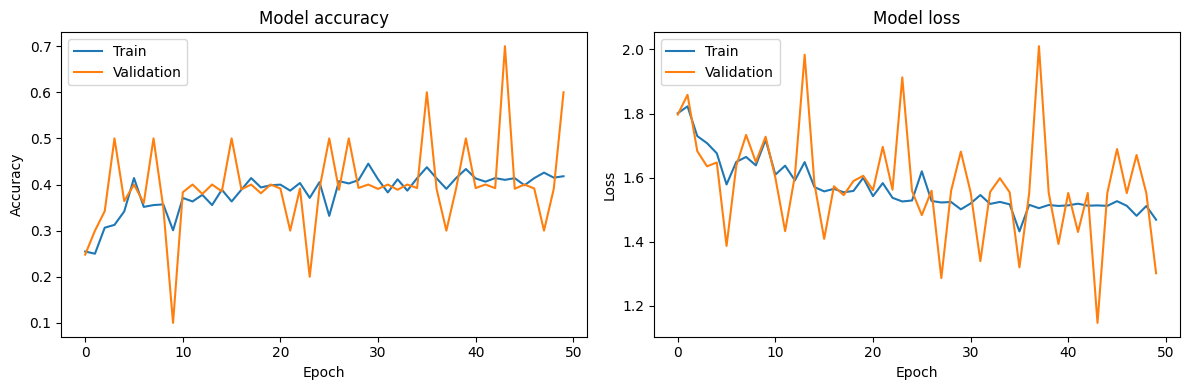

In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Stochastic Learning 

In [28]:
batch_size = 1
history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[checkpoint_callback_val,checkpoint_callback_train,reduce_lr],
    verbose=1
)


Epoch 1/50
  109/28709 ━━━━━━━━━━━━━━━━━━━━ 18:09 38ms/step - accuracy: 0.4142 - loss: 1.5162
Epoch 1: val_accuracy did not improve from 0.70000

Epoch 1: accuracy did not improve from 0.44531
28709/28709 ━━━━━━━━━━━━━━━━━━━━ 6s 184us/step - accuracy: 0.4160 - loss: 1.5108 - val_accuracy: 0.3906 - val_loss: 1.5511 - learning_rate: 3.9063e-06
Epoch 2/50
  106/28709 ━━━━━━━━━━━━━━━━━━━━ 18:44 39ms/step - accuracy: 0.4152 - loss: 1.5035
Epoch 2: val_accuracy did not improve from 0.70000

Epoch 2: accuracy did not improve from 0.44531
28709/28709 ━━━━━━━━━━━━━━━━━━━━ 6s 181us/step - accuracy: 0.4153 - loss: 1.5105 - val_accuracy: 0.3909 - val_loss: 1.5512 - learning_rate: 3.9063e-06
Epoch 3/50
  109/28709 ━━━━━━━━━━━━━━━━━━━━ 18:17 38ms/step - accuracy: 0.4167 - loss: 1.5069
Epoch 3: val_accuracy did not improve from 0.70000

Epoch 3: accuracy did not improve from 0.44531
28709/28709 ━━━━━━━━━━━━━━━━━━━━ 6s 182us/step - accuracy: 0.4152 - loss: 1.5103 - val_accuracy: 0.3902 - val_loss: 1.5

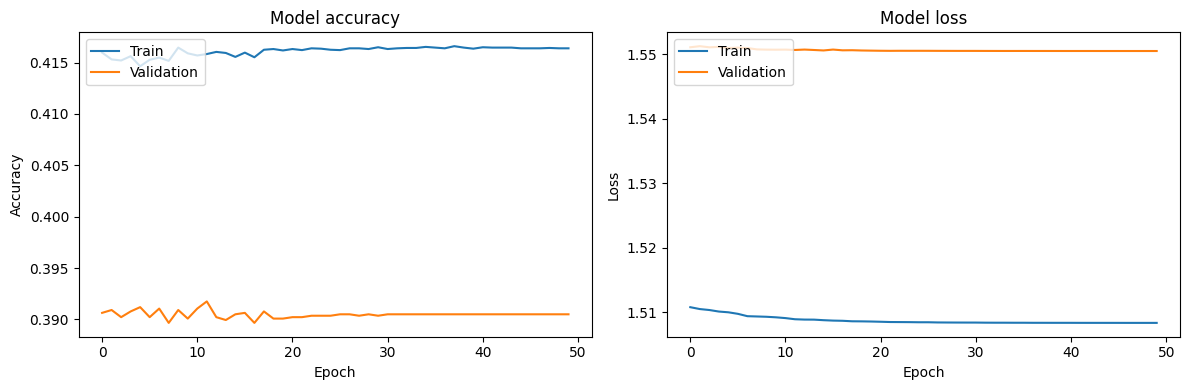

In [29]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

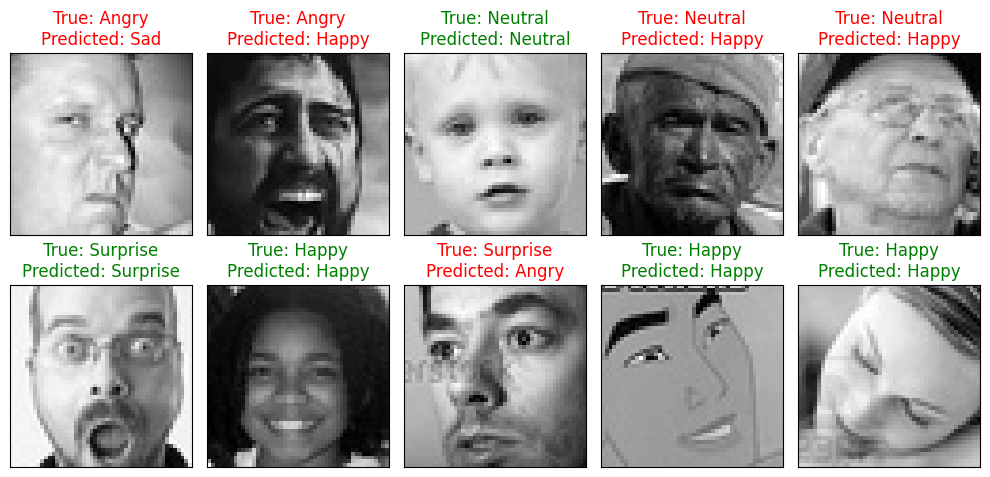

In [35]:
import numpy as np
Emotion_Classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

batch_size = test_generator.batch_size

Random_batch = np.random.randint(0, len(test_generator) - 1)
Random_Img_Index = np.random.randint(0, batch_size, 10) 

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
   
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = test_generator[Random_batch][1][Random_Img_Index[i]]  
    
    
    Random_Img_Label_Index = np.argmax(Random_Img_Label, axis=-1)  

    Model_Prediction = np.argmax(model1.predict(tf.expand_dims(Random_Img, axis=0), verbose=0), axis=1)[0]

    ax.imshow(Random_Img.squeeze(), cmap='gray')  

   
    color = "green" if Emotion_Classes[Random_Img_Label_Index] == Emotion_Classes[Model_Prediction] else "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label_Index]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)


plt.tight_layout()
plt.show()